In [65]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Reading in the main csv into a main dataframe and manipulating the data to delete the outliers

In [66]:
path = ("Resources/Customers.csv")
main_df = pd.read_csv(path)
main_df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [67]:
main_df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [68]:
#dropping the customer id column
main_df1 = main_df.drop(columns='CustomerID')
main_df1


,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...
1995,Female,71,184387,40,Artist,8,7
1996,Female,91,73158,32,Doctor,7,7
1997,Male,87,90961,14,Healthcare,9,2
1998,Male,77,182109,4,Executive,7,2


In [69]:
#making the age range be 25-65
main_df2 = main_df1[(main_df1['Age'] >=25) & (main_df1['Age'] <=65)]
main_df2

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
4,Female,31,38000,40,Entertainment,2,6
6,Female,35,31000,6,Healthcare,1,3
8,Male,64,97000,3,Engineer,0,3
9,Female,30,98000,72,Artist,1,4
11,Female,35,93000,99,Healthcare,4,4
...,...,...,...,...,...,...,...
1987,Male,63,59244,80,Artist,7,1
1988,Female,54,118944,77,Artist,4,4
1989,Female,47,75293,55,Doctor,6,7
1990,Female,30,166983,69,Artist,7,3


In [70]:
#making work experience greater than 0
main_df3 = main_df2[main_df2['Work Experience']>0]
main_df3.head()


,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
4,Female,31,38000,40,Entertainment,2,6
6,Female,35,31000,6,Healthcare,1,3
9,Female,30,98000,72,Artist,1,4
11,Female,35,93000,99,Healthcare,4,4
16,Female,35,29000,35,Homemaker,9,5


In [71]:
subset = main_df3[['Annual Income ($)', 'Spending Score (1-100)']]

In [72]:
main_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 4 to 1993
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  672 non-null    object
 1   Age                     672 non-null    int64 
 2   Annual Income ($)       672 non-null    int64 
 3   Spending Score (1-100)  672 non-null    int64 
 4   Profession              660 non-null    object
 5   Work Experience         672 non-null    int64 
 6   Family Size             672 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 42.0+ KB


In [73]:
main_df4=main_df3.dropna()
main_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 4 to 1993
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  660 non-null    object
 1   Age                     660 non-null    int64 
 2   Annual Income ($)       660 non-null    int64 
 3   Spending Score (1-100)  660 non-null    int64 
 4   Profession              660 non-null    object
 5   Work Experience         660 non-null    int64 
 6   Family Size             660 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 41.2+ KB


In [74]:
cleaned_df=pd.get_dummies(main_df4,dtype=int)

In [75]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 4 to 1993
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       660 non-null    int64
 1   Annual Income ($)         660 non-null    int64
 2   Spending Score (1-100)    660 non-null    int64
 3   Work Experience           660 non-null    int64
 4   Family Size               660 non-null    int64
 5   Gender_Female             660 non-null    int64
 6   Gender_Male               660 non-null    int64
 7   Profession_Artist         660 non-null    int64
 8   Profession_Doctor         660 non-null    int64
 9   Profession_Engineer       660 non-null    int64
 10  Profession_Entertainment  660 non-null    int64
 11  Profession_Executive      660 non-null    int64
 12  Profession_Healthcare     660 non-null    int64
 13  Profession_Homemaker      660 non-null    int64
 14  Profession_Lawyer         660 non-null   

In [76]:
scaled_data = StandardScaler().fit_transform(cleaned_df[["Annual Income ($)", "Spending Score (1-100)", "Work Experience", "Family Size"]])
scaled_data

array([[-1.44728343, -0.39818237, -0.83252486,  1.1905235 ],
       [-1.5953273 , -1.62875838, -1.10905551, -0.34713895],
       [-0.17833598,  0.76000681, -1.10905551,  0.1654152 ],
       ...,
       [-0.65856914,  0.14471881,  0.27359775,  1.70307765],
       [ 1.28059405,  0.65142658,  0.5501284 , -0.34713895],
       [ 1.45551845,  1.77342235,  1.10318971,  0.67796935]])

In [77]:
df_scaled_data = pd.DataFrame(
    scaled_data,
    columns = ["Annual Income ($)", "Spending Score (1-100)", "Work Experience", "Family Size"]
)
cleaned_df['Annual Income ($)'] = df_scaled_data['Annual Income ($)']
cleaned_df['Spending Score (1-100)'] = df_scaled_data["Spending Score (1-100)"]
cleaned_df['Work Experience'] = df_scaled_data["Work Experience"]
cleaned_df['Family Size'] = df_scaled_data["Family Size"]


cleaned_df.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
4,31,-1.637626,-0.579149,1.103190,0.677969,1,0,0,0,0,1,0,0,0,0,0
6,35,-0.220634,-0.579149,1.932782,-1.372247,1,0,0,0,0,0,0,1,0,0,0
9,30,-0.749362,0.796200,-0.002933,-0.859693,1,0,1,0,0,0,0,0,0,0,0
11,35,-1.151196,1.121941,-1.109056,-0.347139,1,0,0,0,0,0,0,1,0,0,0
16,35,-1.954862,-1.230631,-0.002933,-1.372247,1,0,0,0,0,0,0,0,1,0,0


In [78]:
cleaned_df.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
4,31,-1.637626,-0.579149,1.103190,0.677969,1,0,0,0,0,1,0,0,0,0,0
6,35,-0.220634,-0.579149,1.932782,-1.372247,1,0,0,0,0,0,0,1,0,0,0
9,30,-0.749362,0.796200,-0.002933,-0.859693,1,0,1,0,0,0,0,0,0,0,0
11,35,-1.151196,1.121941,-1.109056,-0.347139,1,0,0,0,0,0,0,1,0,0,0
16,35,-1.954862,-1.230631,-0.002933,-1.372247,1,0,0,0,0,0,0,0,1,0,0


In [79]:
cleaned_df = cleaned_df.dropna()


In [80]:
cleaned_df = cleaned_df[['Annual Income ($)', 'Spending Score (1-100)']]

In [81]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 4 to 658
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Annual Income ($)       260 non-null    float64
 1   Spending Score (1-100)  260 non-null    float64
dtypes: float64(2)
memory usage: 6.1 KB


# Initializing the KMeans algorithm and creating an elbow graph to determine number of customer segments

In [82]:
# Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
k = list(range(1, 11))

In [83]:
for i in k:
    k_model = KMeans(n_clusters=i)
    k_model.fit(cleaned_df)
    inertia.append(k_model.inertia_)

In [84]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}

# Create the DataFrame from the elbow data
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,525.270487
1,2,326.781843
2,3,200.756534
3,4,145.112442
4,5,119.799709


In [85]:
# Plot the DataFrame
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

# Initializing the model and plotting the clusters

In [86]:
model = KMeans(n_clusters = 4)

In [87]:
model.fit(cleaned_df)

KMeans(n_clusters=4)

In [88]:
clusters = model.predict(cleaned_df)
print(clusters)

[3 3 2 2 3 3 3 2 3 3 3 3 2 2 3 3 3 2 3 3 2 3 3 2 3 3 3 2 2 2 2 3 3 2 2 2 2
 2 2 2 2 2 2 2 3 2 3 2 2 3 3 3 2 2 3 3 3 2 3 3 2 3 2 2 2 3 2 1 0 0 0 1 2 2
 0 2 0 2 3 2 1 0 3 1 1 0 3 2 1 0 2 2 0 1 3 1 1 3 1 0 2 0 1 2 2 0 0 3 1 0 2
 1 2 0 1 1 2 3 2 0 2 2 2 0 1 1 0 0 3 0 3 2 3 3 0 0 0 0 2 0 0 1 0 2 3 0 3 1
 3 0 1 3 0 1 2 0 1 1 0 2 1 0 0 3 0 2 0 1 0 0 2 0 0 2 0 0 3 3 0 2 2 0 0 2 1
 1 0 1 0 1 1 0 0 2 3 2 2 1 3 1 2 3 1 0 1 1 2 1 0 0 0 0 0 0 2 3 0 0 0 1 2 3
 3 1 2 3 1 0 2 0 0 1 1 3 0 0 0 2 2 3 0 1 1 3 3 1 3 0 1 3 3 2 1 0 1 1 3 2 1
 1]


In [89]:
df_predictions = cleaned_df.copy()

In [90]:
df_predictions['predicted_clusters']=clusters
df_predictions.head()

,Annual Income ($),Spending Score (1-100),predicted_clusters
4,-1.637626,-0.579149,3
6,-0.220634,-0.579149,3
9,-0.749362,0.796200,2
11,-1.151196,1.121941,2
16,-1.954862,-1.230631,3


In [91]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

KeyError: 'Age'

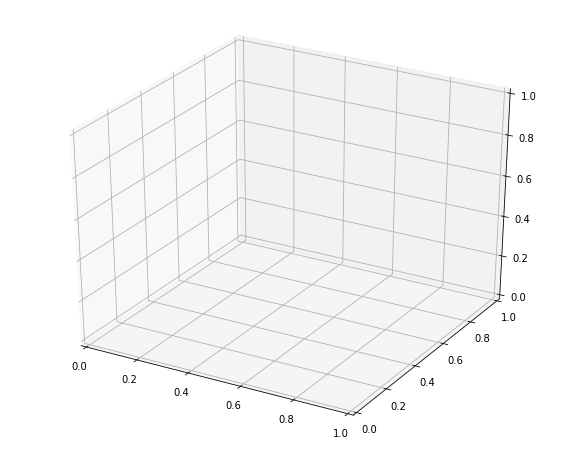

In [92]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

x = df_predictions["Annual Income ($)"]
y = df_predictions["Spending Score (1-100)"]
z = df_predictions["Age"]
predicted_clusters = df_predictions['predicted_clusters']
scatter = ax.scatter(x, y, z, c=predicted_clusters)
ax.set_xlabel("Annual Income($)")
ax.set_ylabel("Spending Score (1-100)")
ax.set_zlabel("Age")
plt.show()

In [93]:
predictions_plot = df_predictions.hvplot.scatter(
    x="Annual Income ($)",
    y="Spending Score (1-100)",
    by= "predicted_clusters",
    
)
predictions_plot

:NdOverlay   [predicted_clusters]
   :Scatter   [Annual Income ($)]   (Spending Score (1-100))

# Initializing model with the PCA method

In [94]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(cleaned_df)
pca_data[:5]

array([[ 1.29561351,  1.05192709],
       [-0.06122982,  0.64346588],
       [ 0.84151262, -0.52109248],
       [ 1.32018694, -0.71717397],
       [ 1.41158869,  1.76720118]])

In [95]:
df_pca = pd.DataFrame(pca_data, columns = ["PCA1", "PCA2"])
df_pca.head()


,PCA1,PCA2
0,1.295614,1.051927
1,-0.061230,0.643466
2,0.841513,-0.521092
3,1.320187,-0.717174
4,1.411589,1.767201


In [96]:
model2 = KMeans(n_clusters = 4)
model.fit(df_pca)
pca_clusters = model.predict(df_pca)

In [97]:
df_predictions_pca = df_pca.copy()
df_predictions_pca['pca_predictions'] = pca_clusters
df_predictions_pca.head()

,PCA1,PCA2,pca_predictions
0,1.295614,1.051927,0
1,-0.061230,0.643466,0
2,0.841513,-0.521092,1
3,1.320187,-0.717174,1
4,1.411589,1.767201,0


In [98]:
predictions_pca_plot = df_predictions_pca.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="pca_predictions",
    
    
    
)
predictions_pca_plot

:NdOverlay   [pca_predictions]
   :Scatter   [PCA1]   (PCA2)

In [99]:
final_df = df_predictions.drop(columns=['Gender_Female','Gender_Male','Profession_Artist','Profession_Doctor','Profession_Engineer',
                                        'Profession_Entertainment','Profession_Executive','Profession_Healthcare','Profession_Homemaker','Profession_Lawyer','Profession_Marketing'])

final_df[["gender", "profession"]] = main_df4[["Gender", "Profession"]]

final_df.head()

KeyError: "['Gender_Female' 'Gender_Male' 'Profession_Artist' 'Profession_Doctor'\n 'Profession_Engineer' 'Profession_Entertainment' 'Profession_Executive'\n 'Profession_Healthcare' 'Profession_Homemaker' 'Profession_Lawyer'\n 'Profession_Marketing'] not found in axis"

In [ ]:
path = ("Resources/predictions.xlsx")
final_df.to_excel(path)

# Making a 3d graph

In [ ]:
 = cleaned_df [['Age', 'Spending Score (1-100)', 'Annual Income ($)']]

KeyError: "['Age'] not in index"